In [54]:
# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import accuracy_score


In [66]:
data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\pricing_promo_2019_2021_all.csv')
data = data.drop(columns = "Unnamed: 0")
data.head(2)

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,...,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
0,2019-03-01,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
1,2019-03-02,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81


In [67]:
data.isna().sum().sum(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Columns: 105 entries, Date to FinancedAmount
dtypes: float64(25), int64(79), object(1)
memory usage: 850.8+ KB


(0, None)

In [82]:
feature = ["WrittenSales","Margin","FinancedAmount","Traffic"]
print(data[feature].head(), type(data[feature].iloc[:,0][0]))

   WrittenSales     Margin  FinancedAmount   Traffic
0     267388.65  114438.41      3804921.27   67997.5
1     668799.75  302135.49      5347859.81  134966.5
2     671177.75  299434.47      5193938.29  125703.0
3     265077.82  123662.13      1842761.07   58639.5
4     161678.91   64793.74      3814992.83   45278.5 <class 'numpy.float64'>


In [91]:
for i in range(len(feature)):
    print(feature[i], "min:", data[feature].iloc[:,i].min(),"max:", data[feature].iloc[:,i].max())

WrittenSales min: -335377.80999999994 max: 3527566.7700000005
Margin min: -154376.81999999998 max: 1682495.6800000009
FinancedAmount min: 0.0 max: 37672554.06000003
Traffic min: 0.0 max: 575757.5


<AxesSubplot:ylabel='Frequency'>

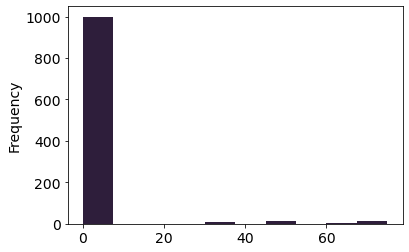

In [115]:
data['Amount of % Off Particular Item'].plot(kind='hist')

In [134]:
percent_df = pd.DataFrame()
percent_df["percent"] = data['Amount of % Off Particular Item'][data['Amount of % Off Particular Item']!=0]
percent_df

,percent
23,35
86,50
87,50
88,50
89,50
90,50
378,75
379,65
380,65
392,30


<AxesSubplot:ylabel='Frequency'>

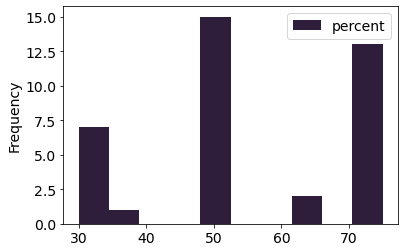

In [135]:
percent_df.plot(kind='hist')

In [136]:
percent_df["Traffic"] = data["Traffic"].copy()
percent_df["WrittenSales"] = data["WrittenSales"].copy()

In [144]:
percent_df


,percent,Traffic,WrittenSales
23,35,185004.0,2272234.08
86,50,94228.5,721426.31
87,50,61641.0,308327.72
88,50,55976.5,268917.64
89,50,50493.0,239974.54
90,50,48566.5,192770.67
378,75,124417.0,2854943.58
379,65,113118.5,789994.98
380,65,80130.0,740605.28
392,30,10098.0,128715.04


<AxesSubplot:xlabel='percent', ylabel='WrittenSales'>

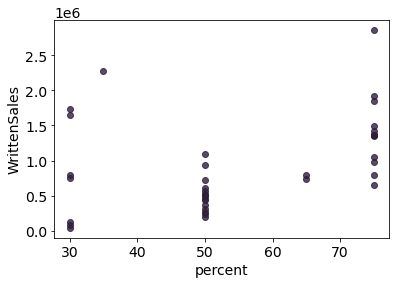

In [141]:
# visualise area-price relationship
sns.regplot(x='percent', y='WrittenSales', data=percent_df, fit_reg=False)

<AxesSubplot:xlabel='percent', ylabel='Traffic'>

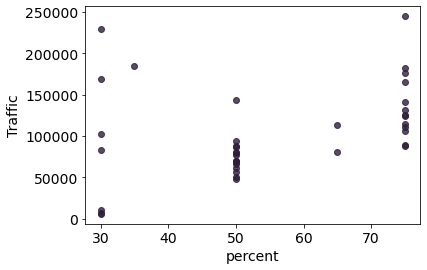

In [145]:
# visualise area-price relationship
sns.regplot(x='percent', y='Traffic', data=percent_df, fit_reg=False)

In [148]:
from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(percent_df.percent, percent_df.Traffic)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.441


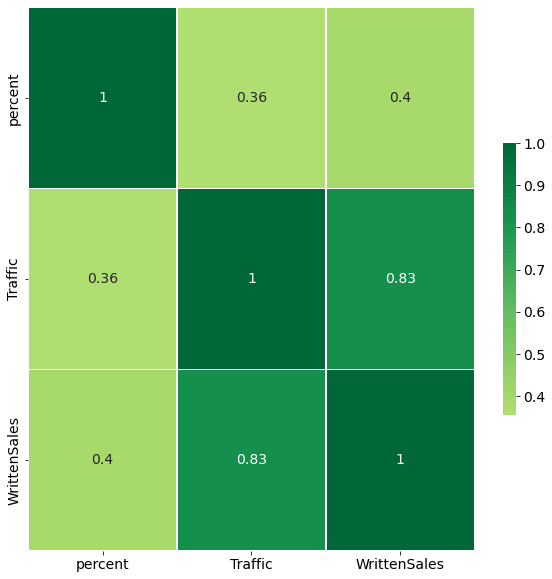

In [151]:
plt.figure(figsize = (10,10))
corr = percent_df.corr()
sns.heatmap (corr, cmap= 'RdYlGn', center=0, annot=True, linewidths=.5, cbar_kws={"shrink": .5});

In [173]:
X = percent_df[["percent"]]
y = percent_df["WrittenSales"]

X_df = data.iloc[:, 1:-4]
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

prediction = lm.predict(X_test)
print(" {} nn score: {} ".format(3,lm.score(X_test,y_test)))

 3 nn score: -0.4389897567416632 


In [175]:
lm.coef_, lm.intercept_

# written sales = -170427.731 + 17441.826(percent)

(array([17441.82605421]), -170427.73170242738)

In [176]:
X = percent_df[["percent"]]
y = percent_df["Traffic"]

X_df = data.iloc[:, 1:-4]
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

prediction = lm.predict(X_test)
print(" {} nn score: {} ".format(3,lm.score(X_test,y_test)))

 3 nn score: -0.33702657287706383 


In [179]:
lm.coef_, lm.intercept_

(array([1376.82306606]), 19255.11151891586)

In [178]:
# Traffic = 19255.111 + 1376.823(percent)

19255.11151891586

In [124]:
data['Amount of % Off Particular Item'][data['Amount of % Off Particular Item']==0].value_counts()/len(data)

0    0.963356
Name: Amount of % Off Particular Item, dtype: float64

In [94]:
data['WrittenSales'].describe()

count    1.037000e+03
mean     5.618369e+05
std      4.155057e+05
min     -3.353778e+05
25%      2.848224e+05
50%      4.339873e+05
75%      7.038849e+05
max      3.527567e+06
Name: WrittenSales, dtype: float64

In [95]:
pd.qcut(data['WrittenSales'], q=4)

0       (-335377.811, 284822.45]
1         (433987.32, 703884.95]
2         (433987.32, 703884.95]
3       (-335377.811, 284822.45]
4       (-335377.811, 284822.45]
                  ...           
1032     (703884.95, 3527566.77]
1033     (703884.95, 3527566.77]
1034     (703884.95, 3527566.77]
1035     (703884.95, 3527566.77]
1036     (703884.95, 3527566.77]
Name: WrittenSales, Length: 1037, dtype: category
Categories (4, interval[float64]): [(-335377.811, 284822.45] < (284822.45, 433987.32] < (433987.32, 703884.95] < (703884.95, 3527566.77]]

In [98]:
data['WrittenSales_4'] = pd.qcut(data['WrittenSales'], q=4)
data['WrittenSales_10'] = pd.qcut(data['WrittenSales'], q=10, precision=0)

data.head(2)

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,...,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount,WrittenSales_4,WrittenSales_10
0,2019-03-01,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27,"(-335377.811, 284822.45]","(265312.0, 305748.0]"
1,2019-03-02,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81,"(433987.32, 703884.95]","(647025.0, 785979.0]"


In [100]:
data['WrittenSales_10'].value_counts()

(-335379.0, 217694.0]     104
(217694.0, 265312.0]      104
(305748.0, 364189.0]      104
(364189.0, 433987.0]      104
(543932.0, 647025.0]      104
(785979.0, 1073621.0]     104
(1073621.0, 3527567.0]    104
(265312.0, 305748.0]      103
(433987.0, 543932.0]      103
(647025.0, 785979.0]      103
Name: WrittenSales_10, dtype: int64

In [103]:
bin_labels_5 = [1,2,3,4,5]
results, bin_edges = pd.qcut(data['WrittenSales'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=bin_labels_5,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])

results_table

,Threshold,Tier
0,-335377.810,1
1,265311.804,2
2,364189.038,3
3,543932.164,4
4,785978.786,5


In [9]:
bins = [-500000,250000,350000,500000,650000,900000, 3600000]
names = [1,2,3,4,5,6]

In [10]:
data["Range"] = pd.cut(data[feature], bins, labels=names)

data["Range"] = pd.Categorical(data["Range"]) 
print(data["Range"].unique())

[2, 5, 1, 3, 6, 4]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]


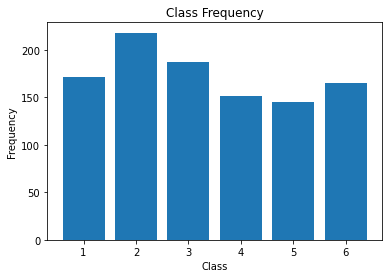

In [11]:
unique, counts = np.unique(data["Range"], return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [12]:
# data = data[data["Range"] <= 7]
# data

In [13]:
data.Range.isna().sum()

0

In [14]:
data.dropna(inplace =True)

In [15]:
data[["WrittenSales", "Range"]]

,WrittenSales,Range
0,267388.65,2
1,668799.75,5
2,671177.75,5
3,265077.82,2
4,161678.91,1
...,...,...
1032,1976177.99,6
1033,1211572.83,6
1034,1057772.56,6
1035,1353736.67,6


In [16]:
data[feature].max(),data["Range"].max()

(3527566.7700000005, 6)

In [17]:
print(data["Range"].unique())

[2, 5, 1, 3, 6, 4]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]


In [18]:
data[feature].max(),data["Range"].max()

(3527566.7700000005, 6)

# Train - Test Split

In [19]:
y = data.Range.astype(int).values

X = data.drop(["Date","Traffic","Margin", "WrittenSales","FinancedAmount","Range"],axis=1).values

X_df = data.drop(["Date","Traffic","Margin", "WrittenSales","FinancedAmount","Range"],axis=1)

In [20]:
y.shape,X.shape

((1037,), (1037, 100))

In [21]:
# # %% train test split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Training target statistics: Counter({2: 150, 3: 130, 1: 120, 6: 118, 4: 105, 5: 102})
Testing target statistics: Counter({2: 68, 3: 57, 1: 51, 6: 47, 4: 46, 5: 43})
Number transactions X_train dataset:  (725, 100)
Number transactions y_train dataset:  (725,)
Number transactions X_test dataset:  (312, 100)
Number transactions y_test dataset:  (312,)


## Feature Scaling

In [22]:


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Oversampling

In [23]:
# from imblearn.over_sampling import SMOTE

# print("Before OverSampling, counts of labels': {}".format(Counter(y_train)))

# oversample = SMOTE()
# X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel())

In [24]:
# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(Counter(y_train_res)))

## Applying PCA

In [25]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# Grid Search 

In [27]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

prediction = lr_model.predict(X_test)
print(" {} nn score: {} ".format(3,lr_model.score(X_test,y_test)))

 3 nn score: 0.40705128205128205 


C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
lr_model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [29]:
# defining parameter range
param_dict = {
    'C': [10**-2,10**-1,10**0,10**1,10**2],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    "penalty": ['none', 'l1', 'l2', 'elasticnet']
             }

In [30]:
clf = GridSearchCV(lr_model, 
                   param_grid = param_dict,
                   cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train.ravel())

clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.4        0.40275862        nan 0.40413793 0.41241379        nan
        nan 0.20689655        nan 0.20689655 0.38068966 0.38068966
 0.38206897 0.38068966 0.38206897        nan        nan        nan
        nan        nan 0.4        0.40275862        nan 0.40413793
 0.41241379        nan        nan 0.37931034        nan 0.38206897
 0.40413793 0.40413793 0.39448276 0.40413793 0.40551724        nan
        nan        nan        nan        nan 0.4        0.40275862
        nan 0.40413793 0.41241379        nan        nan 0.39310345
        nan 0.40551724 0.40689655 0.40689655 0.39586207 0.41103448
 0.40827586        nan        nan        nan        nan        nan
 0.4        0.40275862        nan 0.40413793 0.41241379        nan
        nan 0.39586207        nan 0.41103448 0.40965517 0.40551724
 0.39034483 0.40413793 0.41103448        nan        n

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.4        0.40275862        nan 0.40413793 0.41241379        nan
        nan 0.20689655        nan 0.20689655 0.38068966 0.38068966
 0.38206897 0.38068966 0.38206897        nan        nan        nan
        nan        nan 0.4        0.40275862        nan 0.40413793
 0.41241379        nan        nan 0.37931034        nan 0.38206897
 0.40413793 0.40413793 0.39448276 0.40413793 0.40689655        nan
        nan        nan        nan        nan 0.4        0.40275862
        nan 0.40551724 0.41241379        nan        nan 0.39310345
        nan 0.40689655 0.40689655 0.40689655 0.39586207 0.41103448
 0.40827586        nan        nan        nan        nan        nan
 0.4        0.40275862        nan 0.40413793 0.41241379        nan
        nan 0.39586207        nan 0.41103448 0.40965517 0.40551724
 0.39034483 0.40551724 0.41241379        nan        n

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=5)

In [31]:
lr_model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [32]:
clf.best_params_

{'C': 0.01, 'penalty': 'none', 'solver': 'saga'}

In [33]:
clf.best_estimator_

LogisticRegression(C=0.01, penalty='none', solver='saga')

In [34]:
# Train a LR model with best parameters
lr1 = LogisticRegression(**clf.best_params_, verbose = 5)

lr1.fit(X_train, y_train.ravel()) 

C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=0.01, penalty='none', solver='saga', verbose=5)

In [35]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
# X_train = X_train.T
# X_test = X_test.T
# y_train = y_train.T
# y_test = y_test.T

# print("X_train: ",X_train.shape)
# print("X_test: ",X_test.shape)
# print("y_train: ",y_train.shape)
# print("y_test: ",y_test.shape)

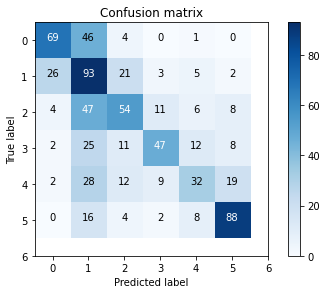

In [37]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

class_names = [0,1,2,3,4,5,6]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [38]:
print(classification_report(y_train, lr1.predict(X_train)))

              precision    recall  f1-score   support

           1       0.67      0.57      0.62       120
           2       0.36      0.62      0.46       150
           3       0.51      0.42      0.46       130
           4       0.65      0.45      0.53       105
           5       0.50      0.31      0.39       102
           6       0.70      0.75      0.72       118

    accuracy                           0.53       725
   macro avg       0.57      0.52      0.53       725
weighted avg       0.56      0.53      0.53       725



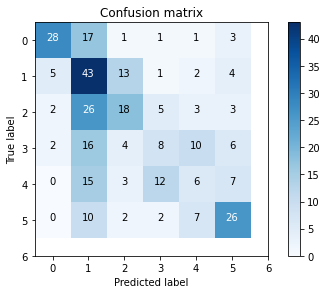

In [39]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

# Plot non-normalized confusion matrix
class_names = [0,1,2,3,4,5,6]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [40]:
print(classification_report(y_test, lr1.predict(X_test)))

              precision    recall  f1-score   support

           1       0.76      0.55      0.64        51
           2       0.34      0.63      0.44        68
           3       0.44      0.32      0.37        57
           4       0.28      0.17      0.21        46
           5       0.21      0.14      0.17        43
           6       0.53      0.55      0.54        47

    accuracy                           0.41       312
   macro avg       0.42      0.39      0.39       312
weighted avg       0.43      0.41      0.40       312



In [41]:
importance = lr1.coef_[0]
lr1.intercept_[0]

-0.5055165052880264

Feature: 0, Score: -0.15750
Feature: 1, Score: 0.09450
Feature: 2, Score: 0.04349
Feature: 3, Score: 0.00548
Feature: 4, Score: -0.02831
Feature: 5, Score: -0.02831
Feature: 6, Score: -0.03839
Feature: 7, Score: -0.01010
Feature: 8, Score: -0.04287
Feature: 9, Score: -0.03507
Feature: 10, Score: -0.03507
Feature: 11, Score: 0.15242
Feature: 12, Score: 0.15242
Feature: 13, Score: -0.02831
Feature: 14, Score: -0.02910
Feature: 15, Score: 0.03966
Feature: 16, Score: 0.03966
Feature: 17, Score: -0.08422
Feature: 18, Score: -0.11076
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.10594
Feature: 21, Score: 0.20463
Feature: 22, Score: -0.01123
Feature: 23, Score: -0.01123
Feature: 24, Score: -0.01101
Feature: 25, Score: -0.01101
Feature: 26, Score: -0.23069
Feature: 27, Score: -0.01890
Feature: 28, Score: 0.10963
Feature: 29, Score: 0.00685
Feature: 30, Score: 0.00186
Feature: 31, Score: 0.00186
Feature: 32, Score: 0.00186
Feature: 33, Score: -0.06490
Feature: 34, Score: -0.06470
Feature: 3

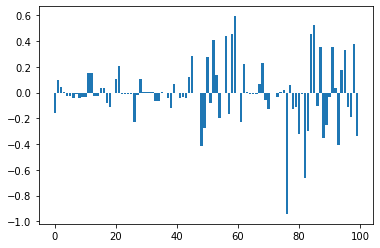

In [42]:
# summarize feature importance
features = []
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    features.append(v)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [43]:
feat_imp = pd.DataFrame(data = features, columns=None)

for i in range(len(X_df.columns)):
#     print(i, "-", str(data.columns[i]) )
    feat_imp.loc[i,"name"] = str(X_df.columns[i])
    
feat_imp = feat_imp.rename(columns={0:'weight'})
feat_imp = feat_imp.sort_values(by = 'weight', ascending = False)

In [44]:
feat_imp

,weight,name
59,0.593611,simple event
85,0.524937,Ontario_C6_Stay at home requirements_1.0
84,0.458693,Ontario_C2_Workplace closing_3.0
58,0.455408,Percent discount?
56,0.438721,OR
...,...,...
88,-0.348942,Manitoba_C1_School closing_2.0
93,-0.409685,Manitoba_C6_Stay at home requirements_2.0
48,-0.416821,High Impact
82,-0.660721,Ontario_C2_Workplace closing_1.0


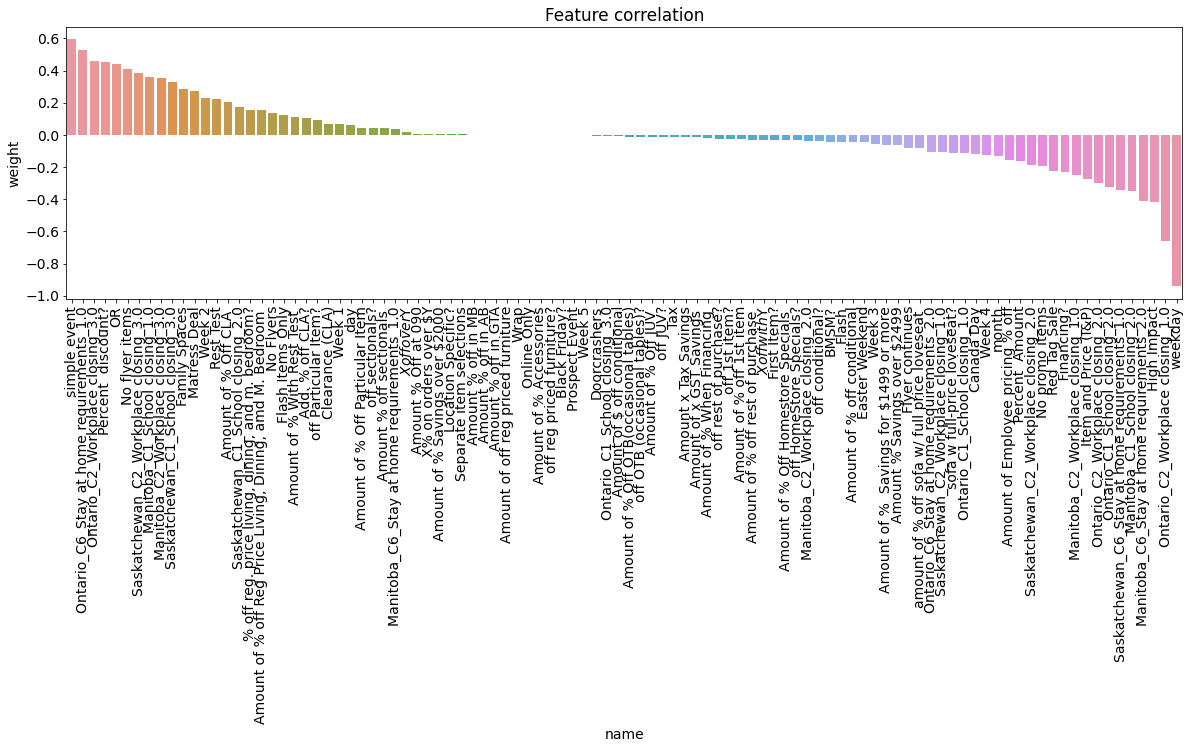

In [45]:
# Set default font size
plt.rcParams['font.size'] = 14

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 90)
plt.title('Feature correlation')
sns.barplot (data = feat_imp, x = feat_imp.name, y = 'weight');

Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

In [53]:

acc = accuracy_score(y_test, y_pre)

print("Accuracy for Traffic GridSearchCV RFE:",acc)

Accuracy for Traffic GridSearchCV RFE: 0.41346153846153844
